In [1]:
import gymnasium as gym

env = gym.make("CartPole-v1")

observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [1]:
from __future__ import annotations

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

import gymnasium as gym


# Let's start by creating the blackjack environment.
# Note: We are going to follow the rules from Sutton & Barto.
# Other versions of the game can be found below for you to experiment.

env = gym.make("Blackjack-v1", sab=True, render_mode="rgb_array")

In [7]:
# reset the environment to get the first observation
done = False
observation, info = env.reset()

In [8]:
observation

(14, 10, 0)

In [9]:
info

{}

In [13]:
print(f"Your hand: {observation[0]}, Dealer's showing card: {observation[1]}, Usable ace: {observation[2]}")

# Player's choice
action = input("Do you want to hit (1) or stick (0)? ")
while action not in ['0', '1']:
    action = input("Invalid input. Please enter 1 to hit or 0 to stick: ")
action = int(action)
    
observation, reward, done, truncated, info = env.step(action)
if done:
    if reward > 0:
        print("You won!")
    elif reward < 0:
        print("You lost.")
    else:
        print("It's a draw.")
    print(f"Final hand: {observation[0]}, Dealer's hand: {observation[1]}")
else:
    print(f"New hand: {observation[0]}, Usable ace: {observation[2]}")

Your hand: 29, Dealer's showing card: 10, Usable ace: 0
You lost.
Final hand: 33, Dealer's hand: 10


In [14]:
env.render()

array([[[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]],

       [[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]],

       [[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]],

       ...,

       [[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]],

       [[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]],

       [[ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36],
        ...,
        [ 7, 99, 36],
        [ 7, 99, 36],
        [ 7, 99, 36]]], dtype=uint8)

In [2]:
import matplotlib.pyplot as plt

# Assuming `frame` is the np.ndarray returned by the environment's render method with mode="rgb_array"
# For example:
# frame = env.render(mode="rgb_array")

def display_image_from_array(array):
    """
    Displays an image given a numpy array of RGB values.

    Parameters:
    - array: np.ndarray. The numpy array representing the RGB values of the image.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(array)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


In [3]:
# Now, you can display the image using the function
display_image_from_array(env.render())

ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.

In [4]:
# from guidance import models, gen, any_char, any_char_but, regex, substring, substring_no_empty, with_temperature, select
from guidance import models, select

lm = models.LlamaCpp("/Users/nicholasking/code/models/mistral-7b-v0.1.Q8_0.gguf", n_gpu_layers=-1, n_ctx=4096)

In [69]:
blackjack_agent = lm + """# Instructions
You are playing a game of blackjack. Pick the best action to win the game.

# Game Start
"""

In [70]:
env = gym.make("Blackjack-v1", sab=True, render_mode="rgb_array")

In [71]:
observation, info = env.reset()

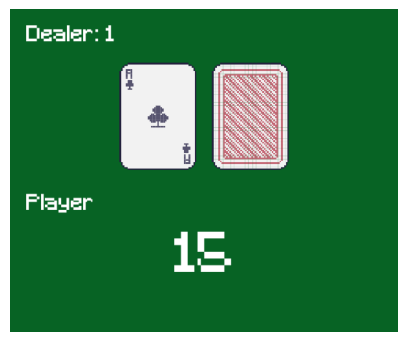

In [72]:
blackjack_agent += f"\nYour hand: {observation[0]}, Dealer's showing card: {observation[1]}, Usable ace: {observation[2]}"
display_image_from_array(env.render())

In [73]:
blackjack_agent += f"""
Do you want to hit or stick?

Your choice: {select(["hit", "stick"], name="choice")}"""

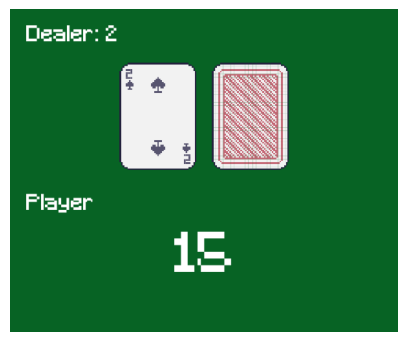

In [66]:
if blackjack_agent["choice"] == "hit":
    action = 1
else:
    action = 0

observation, reward, done, truncated, info = env.step(action)
if done:
    blackjack_agent += f"\nFinal hand: {observation[0]}, Dealer's hand: {observation[1]}\n"
    if reward > 0:
        blackjack_agent += "You won!"
    elif reward < 0:
        blackjack_agent += "You lost."
    else:
        blackjack_agent += "It's a draw."
else:
    blackjack_agent += f"\nYour hand: {observation[0]}, Dealer's showing card: {observation[1]}, Usable ace: {observation[2]}"
display_image_from_array(env.render())

In [19]:
pong_env = gym.make("Pong-v0", render_mode="rgb_array", obs_type="ram")

/Users/nicholasking/code/ms/guidance/env/lib/python3.8/site-packages/gymnasium/envs/registration.py:513: DeprecationWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


In [20]:
observation, info = pong_env.reset()

In [22]:
for row in observation:
    print(row)

192
0
0
0
110
38
0
7
71
1
60
59
0
0
0
62
255
0
255
253
0
22
0
24
128
32
1
86
247
86
247
86
247
134
243
245
243
240
240
242
242
32
32
64
64
64
188
65
189
0
22
109
37
37
60
0
0
0
0
109
109
37
37
192
192
192
192
1
192
202
247
202
247
202
247
202
247
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
54
236
242
121
240


: 

/Users/nicholasking/code/ms/guidance/env/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


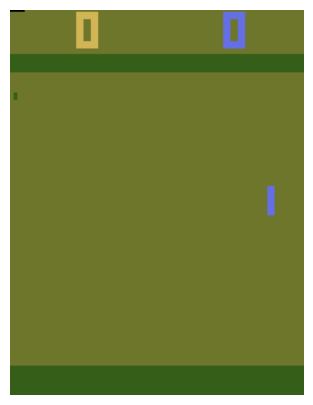

In [11]:
display_image_from_array(pong_env.render())